In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import functions as fct
import pairing_poisson_tc as pair
#reload(fct)
reload(pair)
%matplotlib inline

In [23]:
#time constants
taul=0.01
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
dt=0.0005

#timesteps for one stimulation interval
timesteps=5000

# different input rates
low_rate=5.
medium_rate=10.
high_rate=20.

#rate of post synaptic stimulation
post_rate=20.

#different weights (all excitatory)
low_weight=0.01
medium_weight=0.04
high_weight=0.12


#learning rate
lr=0.05

38.4615384615


In [24]:
parameter={
    "taul":taul,
    "taus":taus,
    "dt":dt,
    "kernel":pair.eps,
    "intepsquad":intepsquad,
    "inteps":inteps,
    "timesteps":timesteps,
    "rate":low_rate,
    "lr":lr,
    "rho":pair.sigmoidal,
    "rhoprime":pair.sigmoidalp,
    "threshold":15.,
    "slope":0.2,
    "maxfire":100.,
    "post_rate":post_rate,
    "g1":pair.g1,
    "g2":pair.g2,
    "f":pair.fsigmoid,
    "init":pair.init,
    "pre_learning_time":1.,
    "learning_time":5.,
    "interval_length":.1,
    "total_time":6.1,
    "alpha":1.,
    "learning_rule":pair.ngradient,
    "percentage":1, #0 for absolute weight change plot, 1 for relative
    "label":("small EPSP variance","medium EPSP variance","high EPSP variance"),
    "ylimits":[98.3,101.7],
    "ofile":"2018_06-07_pairing_different_taus_Poisson.svg",
    "pspfile":"2018-08-09_psp_histogram_low_var.svg"
    }

In [25]:
print(parameter["maxfire"]*pair.sigmoidal(low_weight*low_rate,**parameter))
print(parameter["maxfire"]*pair.sigmoidal(high_weight*low_rate,**parameter))
print(parameter["maxfire"]*pair.sigmoidal(low_weight*high_rate,**parameter))
print(parameter["maxfire"]*pair.sigmoidal(high_weight*high_rate,**parameter))

6.91384203433
85.81489351
6.91384203433
85.81489351


Pairing protocol for one synapse excitatory pre/post pairing at different rates and different weights.

In [26]:
parameter["rate"]=medium_rate
weight=medium_weight

In [27]:
taul=0.02
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
parameter["taul"]=taul
parameter["taus"]=taus
parameter["inteps"]=inteps
parameter["intepsquad"]=intepsquad

21.7391304348


199.19228744


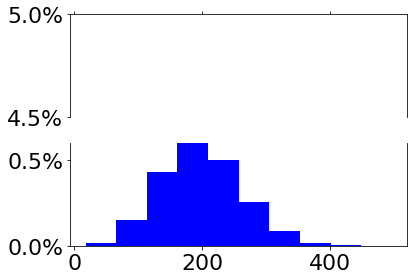

In [28]:
xeps=np.zeros(20000)
for i in range(20000):
    xeps[i]=pair.init(**parameter)["pre"][-1]
print(np.mean(xeps))
pair.plot_psp_histogram(xeps,**parameter)    

In [29]:
learn_simu=pair.nlearning(weight,**parameter)
lweights=learn_simu["weight"]
spikes=learn_simu["spikes"]

In [30]:
#pair.plotspikes(spikes,**parameter)

In [31]:
taul=0.01
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
parameter["taul"]=taul
parameter["taus"]=taus
parameter["inteps"]=inteps
parameter["intepsquad"]=intepsquad
parameter["pspfile"]="2018-08-09_psp_histogram_medium_var.svg"

38.4615384615


199.179681447


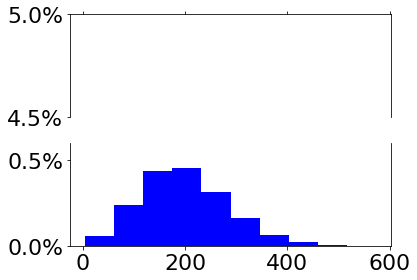

In [32]:
xeps=np.zeros(20000)
for i in range(20000):
    xeps[i]=pair.init(**parameter)["pre"][-1]
print(np.mean(xeps))
pair.plot_psp_histogram(xeps,**parameter)    

In [33]:
mweights=pair.nlearning(weight,**parameter)["weight"]

In [34]:
taul=0.005
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
parameter["taul"]=taul
parameter["taus"]=taus
parameter["inteps"]=inteps
parameter["intepsquad"]=intepsquad
parameter["pspfile"]="2018-08-09_psp_histogram_high_var.svg"

62.5


198.574850109


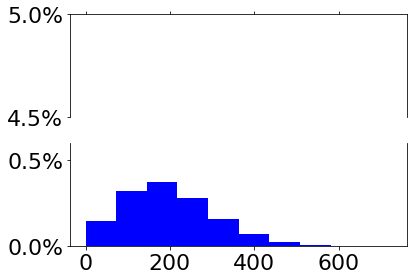

In [35]:
xeps=np.zeros(20000)
for i in range(20000):
    xeps[i]=pair.init(**parameter)["pre"][-1]
print(np.mean(xeps))
pair.plot_psp_histogram(xeps,**parameter)   


In [36]:
hweights=pair.nlearning(weight,**parameter)["weight"]


In [37]:
weights=np.array((lweights,mweights,hweights))
rates=np.array((medium_rate,medium_rate,medium_rate))

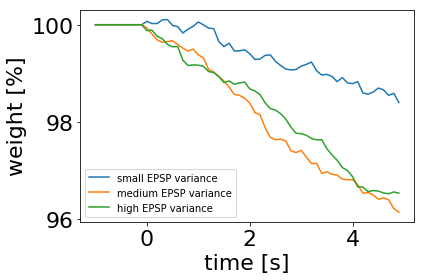

In [38]:
pair.plotLTP(weights,rates,**parameter)

In [39]:
taus=0.003
taul=0.005
parameter["taus"]=taus
var=np.zeros(7)
deltaw=np.zeros(7)
for i in range(7):
    taul=taul+i*0.0025
    fac=(1./((taul-taus)))
    inteps=fac*(taul-taus)
    intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
    print(intepsquad)
    parameter["taul"]=taul
    parameter["inteps"]=inteps
    parameter["intepsquad"]=intepsquad
    var[i]=intepsquad*medium_rate
    w=pair.nlearning(weight,**parameter)["weight"]
    deltaw[i]=w[-1]/w[0]
      

62.5
47.619047619
32.2580645161
21.7391304348
15.1515151515
10.989010989
8.26446280992


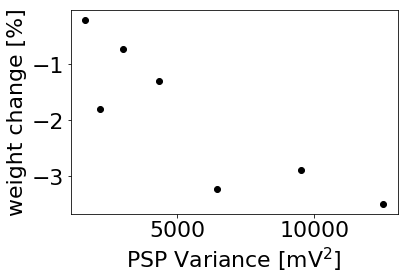

In [40]:
parameter["ofile"]="2018-08-06_poisson_tc_var_deltaw.svg"
pair.plot_var_deltaw(var,deltaw-np.ones(7),**parameter)

In [41]:
parameter["alpha"]=0.7